# Analysis of the Google Play Android App Market

## 1. Exploring Google Play Store Applications and Reviews

The ubiquity of mobile apps, coupled with their ease of creation and potential for profitability, has led to a surge in app development. This notebook aims to conduct a thorough analysis of the Android app market by examining over ten thousand apps available on Google Play, spanning various categories. The objective is to extract valuable insights from the data, enabling the formulation of strategies to enhance both growth and user retention.

Our examination involves two primary datasets:

1. apps.csv: This file encompasses comprehensive details about applications on Google Play, encompassing 13 distinct features that characterize each app.

2. user_reviews.csv: Comprising 100 reviews for each app, arranged in descending order of helpfulness, this file provides pre-processed text for each review. Additionally, three new features—Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity—have been assigned to facilitate a more nuanced understanding of user feedback.

In [1]:
import pandas as pd
import numpy as np

apps_with_duplicates = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Analysis of the Google Play Android App Market\\apps.csv')

# Drop duplicate rows from the dataset to ensure unique app entries
apps = apps_with_duplicates.drop_duplicates()

print('Total number of unique apps in the dataset:', apps.shape[0])

# Displaying a random sample of 5 rows to get a quick overview of the data
print('\nRandom sample of 5 rows from the dataset:')
print(apps.sample(5))

Total number of unique apps in the dataset: 9659

Random sample of 5 rows from the dataset:
      Unnamed: 0                                                App  \
2351        3002                          U + professional baseball   
765          945                                                WWE   
4604        5575  AS - Diario online deportivo. Fútbol, motor y más   
1302        1590                                             H Pack   
5424        6433                                       BL Portfolio   

                Category  Rating  Reviews  Size     Installs  Type Price  \
2351              SPORTS     4.3     2486  18.0     500,000+  Free     0   
765        ENTERTAINMENT     4.5   736864  20.0  10,000,000+  Free     0   
4604  NEWS_AND_MAGAZINES     NaN        0   6.0          50+  Free     0   
1302           LIFESTYLE     4.3     9412   1.7   1,000,000+  Free     0   
5424         PHOTOGRAPHY     NaN        4  16.0         100+  Free     0   

     Content Rating     

## 2. Data Preprocessing

Data preprocessing stands as a crucial subtask in any data science project. While it may entail a laborious process, its significance should never be underestimated.

Upon examining a random sample of dataset rows (as performed in the previous task), it becomes apparent that certain entries in columns such as Installs and Price contain special characters (+, $) as part of their numerical representation. This incorporation of special characters hinders the columns from being exclusively numeric, creating challenges for subsequent mathematical calculations. Ideally, these columns, as implied by their names, should solely comprise digits within the range of [0-9].

Consequently, the next step involves cleaning the data. Specifically, the removal of special characters (, and + in the Installs column, and $ in the Price column) is necessary.

Additionally, it is considered good practice to provide a summary of the dataframe after completing data cleaning. The info() method will be employed for this purpose.

In [2]:
# List of characters to remove from specified columns
chars_to_remove = ['+', ',', '$']

# Columns to clean
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        # Replace the character with an empty string in the specified column
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

print('\nSummary of the cleaned apps dataframe:')
print(apps.info())


Summary of the cleaned apps dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Adjusting Data Types

Upon reviewing the previous task, it was observed that the Installs and Price columns were initially categorized as the object data type instead of the desired int or float type. This discrepancy arose due to a mix of input types, including both digits and special characters in these columns.

The primary focus going forward will be on four key features: Installs, Size, Rating, and Price. While Size and Rating are already in float format, representing purely numerical data, there is a need to address Installs and Price to ensure they are appropriately converted to numeric types.

In [3]:
# Convert 'Installs' column to float data type
apps['Installs'] = apps['Installs'].astype('float')

# Convert 'Price' column to float data type
apps['Price'] = apps['Price'].astype('float')

print('\nData types of the apps dataframe after conversion:')
print(apps.info())


Data types of the apps dataframe after conversion:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Analyzing App Categories

With a user base exceeding 1 billion across 190 countries, Google Play remains a crucial platform for reaching a global audience. In order to enhance app discoverability on Google Play and facilitate a more efficient search experience, apps are organized into categories by Google.

This leads us to the following inquiries:

1. Which category commands the largest share of active apps in the market?
2. Is there a particular category that dominates the market?
3. Which categories exhibit the lowest number of apps?

Our exploration reveals the presence of 33 unique app categories in the dataset, with Family and Game apps enjoying the highest prevalence in the market. Additionally, Tools, Business, and Medical apps also rank prominently among the top categories.

In [4]:
# Import necessary libraries for plotting
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of unique categories:', num_categories)

# Count the number of apps in each 'Category'
num_apps_in_category = apps['Category'].value_counts()

# Sort the counts in descending order based on the number of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

# Bar chart to visualize app distribution across categories
data = [go.Bar(
        x=sorted_num_apps_in_category.index,  # x-axis: category names
        y=sorted_num_apps_in_category.values  # y-axis: count of apps
)]

plotly.offline.iplot(data)

Number of unique categories: 33


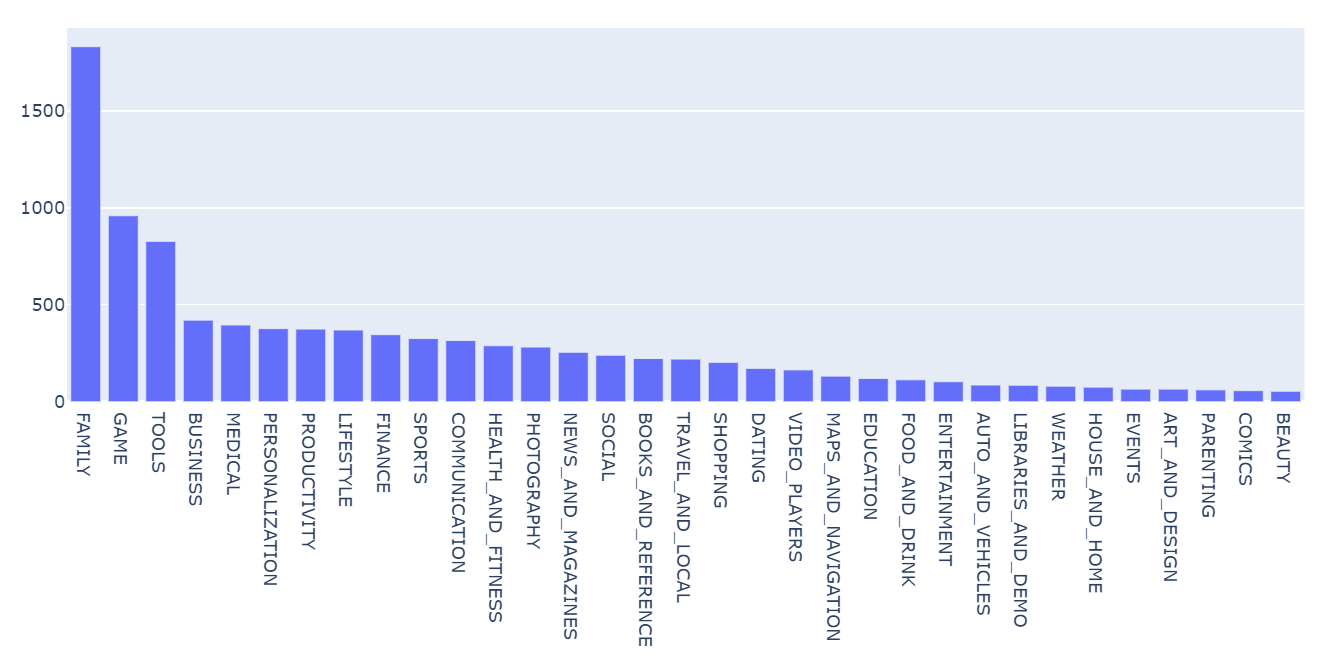

## 5. App Ratings Distribution

Following our exploration of the market share for each app category, let's delve into the overall performance of these apps. App ratings, typically ranging from 1 to 5, play a pivotal role in app discoverability, conversion rates, and contribute significantly to the overall brand image of a company. Ratings serve as a crucial performance indicator for an app.

Our investigation reveals that the average rating across all app categories stands at 4.17. The histogram plot exhibits a leftward skew, indicating that the majority of apps receive high ratings, with only a few exceptions falling into the category of low-rated apps.

In [5]:
# Calculating the average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating:', avg_app_rating)

# Histogram to visualize the distribution of app ratings
data = [go.Histogram(
        x=apps['Rating']
)]

# Vertical line indicating the average app rating
layout = {
    'shapes': [{
        'type': 'line',
        'x0': avg_app_rating,
        'y0': 0,
        'x1': avg_app_rating,
        'y1': 1000,
        'line': {'dash': 'dashdot'}
    }]
}

# Histogram with the average rating indicator
plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating: 4.173243045387998


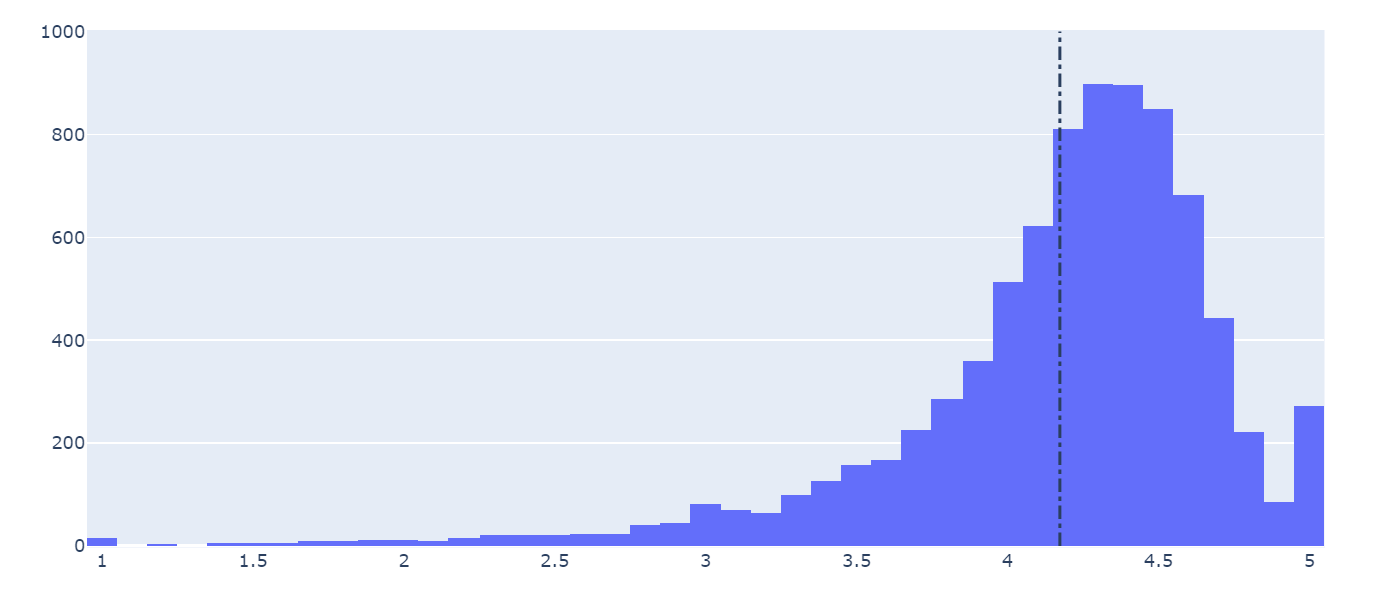

## 6. App Size and Pricing Analysis

Now, let's delve into the dimensions of app size and pricing. When it comes to size, a mobile app that is excessively large may pose challenges for users, as downloading may become difficult or expensive. Prolonged download times can discourage users before they even get to experience the app, and each user's device has limited disk space. Regarding pricing, certain users anticipate apps to be either free or reasonably priced. These considerations become more critical when targeting the developing world, where factors such as internet speeds, purchasing power, and exchange rates come into play.

To formulate effective strategies for sizing and pricing our app, we seek answers to the following questions:

1. Does the size of an app have an impact on its rating?
2. Are users more inclined towards system-heavy apps or do they prefer lightweight alternatives?
3. Does the pricing of an app influence its rating?
4. Do users consistently favor free apps over paid ones?

Our findings indicate that the majority of top-rated apps (with a rating over 4) typically fall within the size range of 2 MB to 20 MB. Furthermore, a significant portion of apps chooses to price themselves below $10.

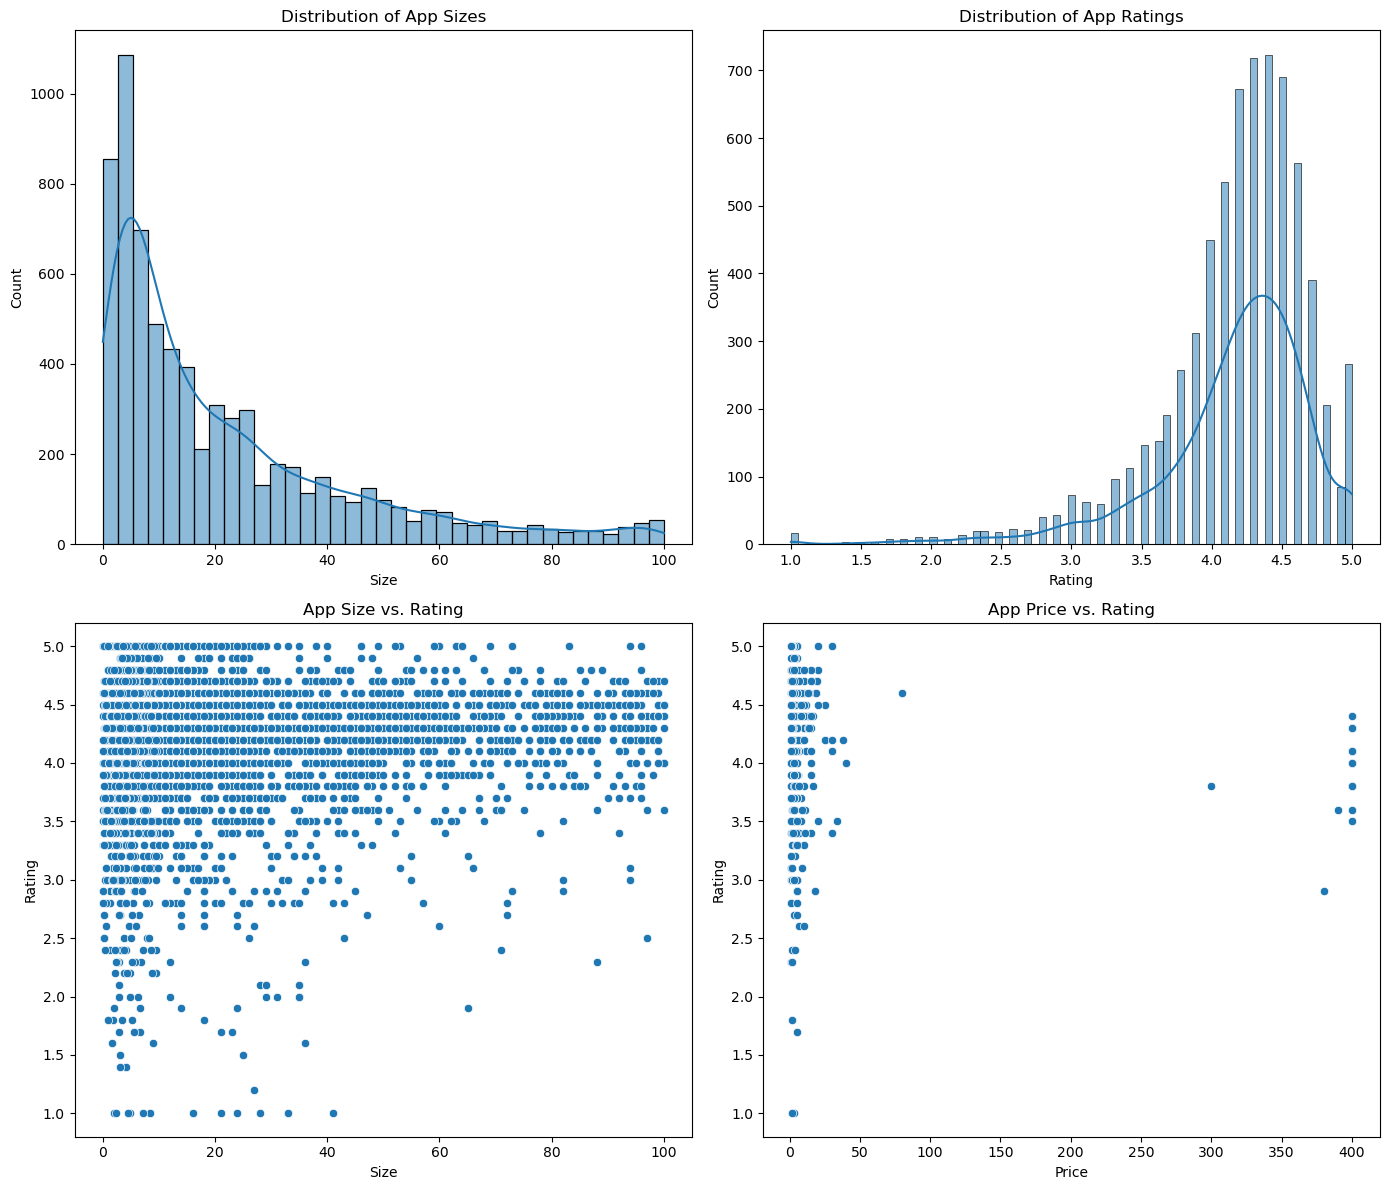

In [6]:
# Import necessary libraries for visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Selecting rows where both 'Rating' and 'Size' values are present (i.e., not null)
apps_with_size_and_rating_present = apps[apps.Rating.notnull() & apps.Size.notnull()]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Plot size distribution
sns.histplot(apps_with_size_and_rating_present['Size'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of App Sizes')

# Plot rating distribution
sns.histplot(apps_with_size_and_rating_present['Rating'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of App Ratings')

# Plot size vs. rating
sns.scatterplot(x=large_categories['Size'], y=large_categories['Rating'], ax=axes[1, 0])
axes[1, 0].set_title('App Size vs. Rating')

# Selecting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
sns.scatterplot(x=paid_apps['Price'], y=paid_apps['Rating'], ax=axes[1, 1])
axes[1, 1].set_title('App Price vs. Rating')

plt.tight_layout()
plt.show()

## 7. Relationship Between App Category and App Pricing

Now, we confront the challenge of how companies and developers can sustain themselves. What strategies can be employed to optimize profits? The pricing of apps is heavily influenced by factors such as features, complexity, and platform.

Choosing an appropriate pricing strategy for a mobile app involves considering various factors. Crucial among them is understanding the willingness of customers to pay for the app. Incorrect pricing could deter potential users, either due to perceived high costs or dissatisfaction with the app's value proposition, leading to app deletion.

Different app categories necessitate different price ranges. For instance, simple daily-use apps like calculators might be best offered for free, while highly-specialized medical apps, providing diagnoses for diabetic patients, could justify a price tag. As observed below, Medical and Family apps tend to be the most expensive, with certain medical apps reaching prices as high as $80. Conversely, game apps are generally reasonably priced, typically below $20.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


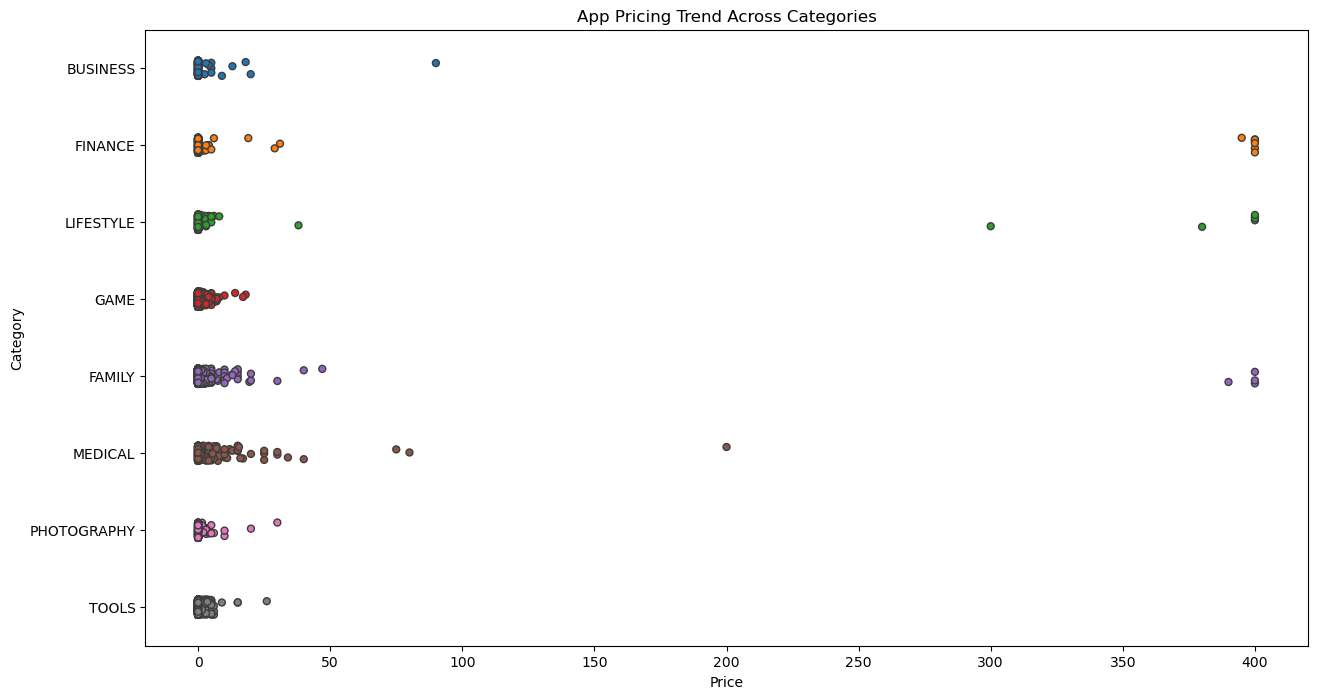

In [7]:
# Set up the figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecting popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE', 'BUSINESS'])]

# Examining the price trend by plotting Price vs Category
ax = sns.stripplot(x=popular_app_cats['Price'], y=popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App Pricing Trend Across Categories')

# Identifying apps with a price greater than 200
apps_above_200 = apps[apps['Price'] > 200]

# Displaying the relevant information for apps with prices above 200
apps_above_200[['Category', 'App', 'Price']]

## 8. Remove Unnecessary Apps

It appears that a considerable number of excessively priced apps fall into the category of "junk" apps—applications lacking a genuine purpose. Some app developers create apps like "I Am Rich Premium" or "most expensive app (H)" for amusement or to experiment with their app development skills. In certain cases, developers may engage in such practices with malicious intent, attempting to generate revenue by relying on accidental purchases in the app store.

To enhance the accuracy of our visualization, we will now filter out these irrelevant or potentially deceptive apps.

Text(0.5, 1.0, 'App Pricing Trend Across Categories (Excluding "Junk" Apps)')

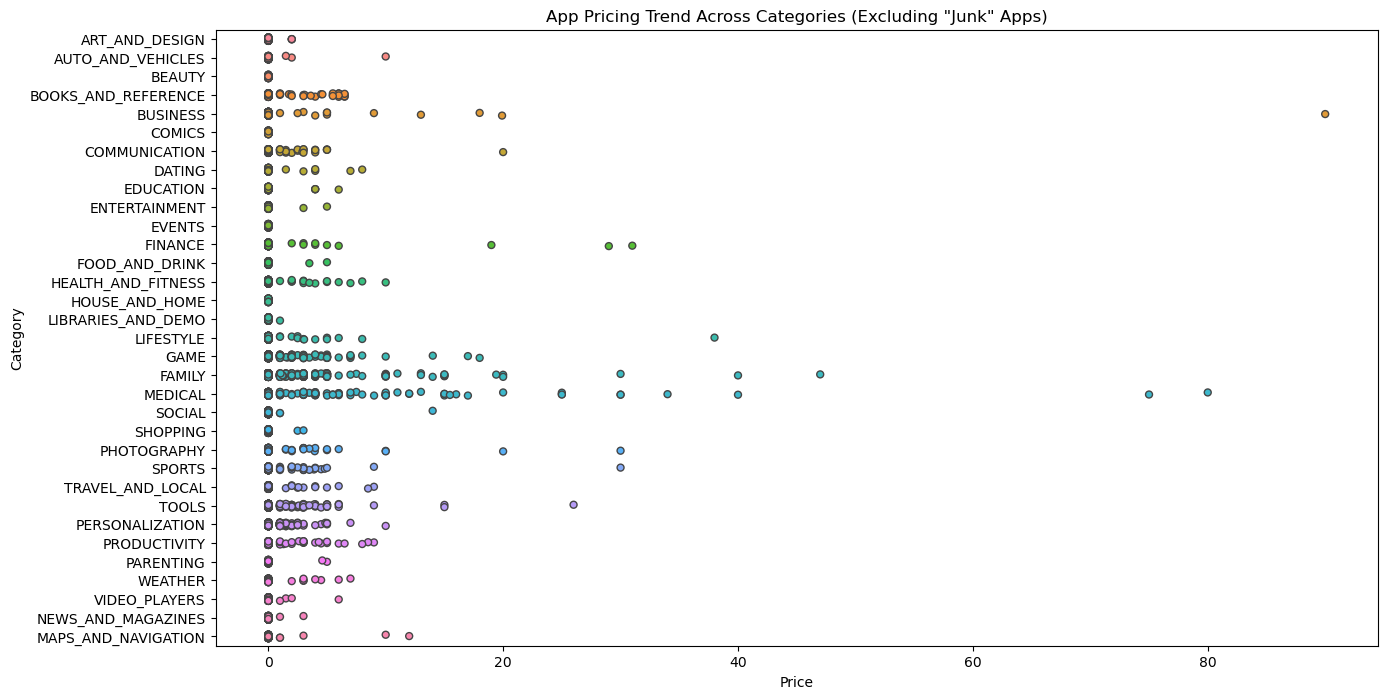

In [8]:
# Filtering apps priced below $100 to exclude "junk" apps
apps_under_100 = apps[apps.Price < 100]

# Set up the figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examining the price trend vs. category with authentic apps (apps_under_100)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100, jitter=True, linewidth=1)
ax.set_title('App Pricing Trend Across Categories (Excluding "Junk" Apps)')

## 9. Comparison of Paid Apps and Free Apps Popularity

In the current landscape of Play Store apps, developers employ various pricing strategies, including free, freemium, paid, paymium, and subscription models. For the purpose of our analysis, we will specifically focus on free and paid apps. Key attributes of free apps include:

1. Available for free download.
2. Primary revenue source often derived from advertisements.
3. Typically developed by companies with other products, using the app as an extension of their offerings.
4. Functions as a tool for customer retention, communication, and customer service.

On the other hand, characteristics of paid apps include:

1. Users are required to make a one-time payment for downloading and using the app.
2. Users may not have the opportunity to explore the app before making a purchase.

The question at hand is whether paid apps garner as many installations as their free counterparts. Surprisingly, it turns out that paid apps tend to have a relatively lower number of installations compared to free apps, though the difference is not as pronounced as one might expect.

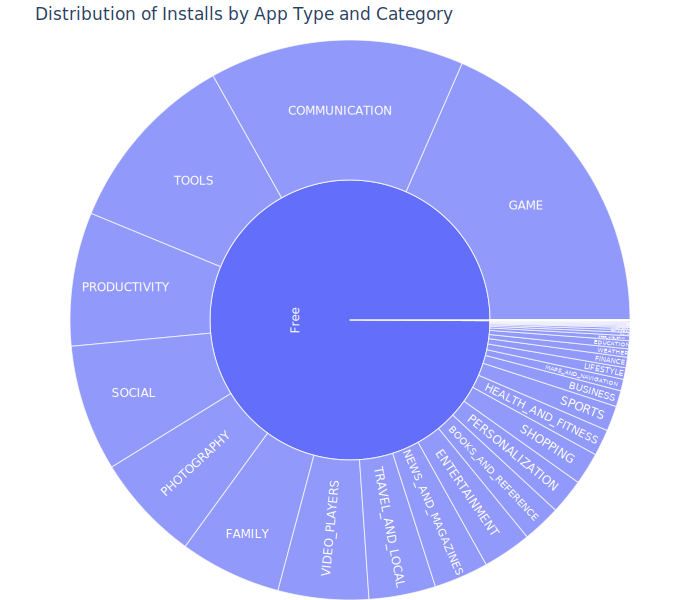

In [9]:
import plotly.express as px

# Sunburst chart to visualize the distribution of installs across different app types
fig = px.sunburst(apps, path=['Type', 'Category'], values='Installs',
                  title='Distribution of Installs by App Type and Category')

fig.update_layout(height=600, margin=dict(l=0, r=0, b=0, t=40))
fig.show("svg")

## 10. Sentiment Analysis of User Reviews

Examining user review data through sentiment analysis is a powerful method to gauge the general sentiment toward a product, brand, or service. This technique allows us to identify whether user opinions about an app are predominantly positive, negative, or neutral. Positive sentiments in app reviews may feature terms such as 'amazing', 'friendly', 'good', 'great', and 'love', while negative sentiments may include words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

When visualizing the sentiment polarity scores of user reviews for both paid and free apps, we observe a notable difference. Free apps tend to attract more severe criticisms, evident from the outliers on the negative y-axis. Conversely, reviews for paid apps seldom exhibit extreme negativity. This observation might suggest a correlation with app quality, indicating that paid apps, on average, have a higher quality compared to their free counterparts. The median polarity score for paid apps is slightly elevated, aligning with our earlier observation.

In this analysis, we delved into over ten thousand apps from the Google Play Store. The insights gained can serve as valuable considerations for future decisions, particularly if there is a desire to venture into app development.

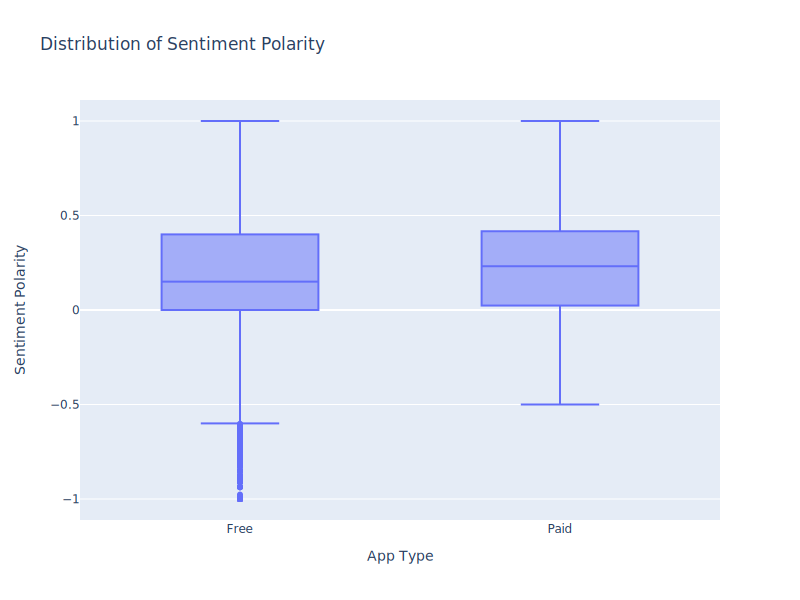

In [10]:
reviews_df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\Analysis of the Google Play Android App Market\\user_reviews.csv")

# Merging the two dataframes based on the 'App' column
merged_df = pd.merge(apps, reviews_df, on="App", how="inner")

# Dropping rows with missing values in 'Sentiment' and 'Review' columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

# Box plot to visualize sentiment polarity for paid vs. free apps
fig = px.box(merged_df, x='Type', y='Sentiment_Polarity', title='Distribution of Sentiment Polarity',
             labels={'Type': 'App Type', 'Sentiment_Polarity': 'Sentiment Polarity'})

fig.update_layout(height=600, width=800, showlegend=False)

fig.show("svg")